In [123]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

In [121]:
data = pd.read_csv('analysisdata.csv')

In [122]:
data.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


In [8]:
# To see dataset dimensions
data.shape

(74, 20)

This means the dataset has 74 rows and 20 columns. Since there are 74 rows, total number of matches played in IPL 2022 is 74.

In [9]:
# To check missing values in the dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

That is, there are no missing values.

In [10]:
# To fetch all columns
data.columns

Index(['match_id', 'date', 'venue', 'team1', 'team2', 'stage', 'toss_winner',
       'toss_decision', 'first_ings_score', 'first_ings_wkts',
       'second_ings_score', 'second_ings_wkts', 'match_winner', 'won_by',
       'margin', 'player_of_the_match', 'top_scorer', 'highscore',
       'best_bowling', 'best_bowling_figure'],
      dtype='object')

In [11]:
# To verify that the columns have no  missing values and to count if any.
data.isnull().sum()

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

As sum is 0 for each column, we can interpret 'no missing column'.

In [12]:
# Number of matches played by each franchise as 'team1'.
data['team1'].value_counts()

team1
Banglore     16
Chennai      12
Delhi        12
Gujarat      10
Hyderabad     7
Kolkata       7
Lucknow       6
Mumbai        3
Punjab        1
Name: count, dtype: int64

In [13]:
# Number of matches played by each franchise as 'team2'.
data['team2'].value_counts()

team2
Rajasthan    17
Punjab       13
Mumbai       11
Lucknow       9
Kolkata       7
Hyderabad     7
Gujarat       6
Chennai       2
Delhi         2
Name: count, dtype: int64

In [14]:
# To find the total number of matches played by each team
data['team1'].value_counts() + data['team2'].value_counts()

Banglore      NaN
Chennai      14.0
Delhi        14.0
Gujarat      16.0
Hyderabad    14.0
Kolkata      14.0
Lucknow      15.0
Mumbai       14.0
Punjab       14.0
Rajasthan     NaN
Name: count, dtype: float64

The 'NaN' value occurs because they played all their matches as 'team1' or 'team2'. 

In [15]:
# To handle the 'NaN' situation
total_matches_played = data['team1'].value_counts().add(data['team2'].value_counts(), fill_value=0).astype(int)
total_matches_played

Banglore     16
Chennai      14
Delhi        14
Gujarat      16
Hyderabad    14
Kolkata      14
Lucknow      15
Mumbai       14
Punjab       14
Rajasthan    17
Name: count, dtype: int32

So, that means, Rajasthan played the most number of matches (17) with Lucknow being second most (15) and all other teams played 14 each.

In [16]:
# To calculate the total matches won by each team
total_won = data['match_winner'].value_counts()
total_won

match_winner
Gujarat      12
Rajasthan    10
Banglore      9
Lucknow       9
Delhi         7
Punjab        7
Kolkata       6
Hyderabad     6
Chennai       4
Mumbai        4
Name: count, dtype: int64

-  Gujarat has the record of winning most number of matches.
-  Rajasthan secured the second highest number of wins.
-  Bangalore & Lucknow (9), Delhi & Punjab (7), Kolkata & Hyderabad (6) and Chennai & Mumbai (4).

In [17]:
# To calculate the win percentage for each team
win_percent = ((total_won/total_matches_played) * 100).sort_values(ascending = False).astype(int)
win_percent

Gujarat      75
Lucknow      60
Rajasthan    58
Banglore     56
Delhi        50
Punjab       50
Hyderabad    42
Kolkata      42
Chennai      28
Mumbai       28
Name: count, dtype: int32

In [18]:
# To create a dataFrame to store team performance with columns named by Total Matches Played, Total Matches Won and Win Percentage

team_performance = pd.DataFrame({'Total Matches Played': total_matches_played, 'Total Matches Won': total_won, 'Win Percentage (%)': win_percent}).sort_values(by='Win Percentage (%)', ascending=False)
team_performance

,Total Matches Played,Total Matches Won,Win Percentage (%)
Gujarat,16,12,75
Lucknow,15,9,60
Rajasthan,17,10,58
Banglore,16,9,56
Delhi,14,7,50
Punjab,14,7,50
Hyderabad,14,6,42
Kolkata,14,6,42
Chennai,14,4,28
Mumbai,14,4,28


This DataFrame summarizes the performance of all IPL franchises in 2022 season.

Text(0.5, 1.0, "'Victory Bar' for each team")

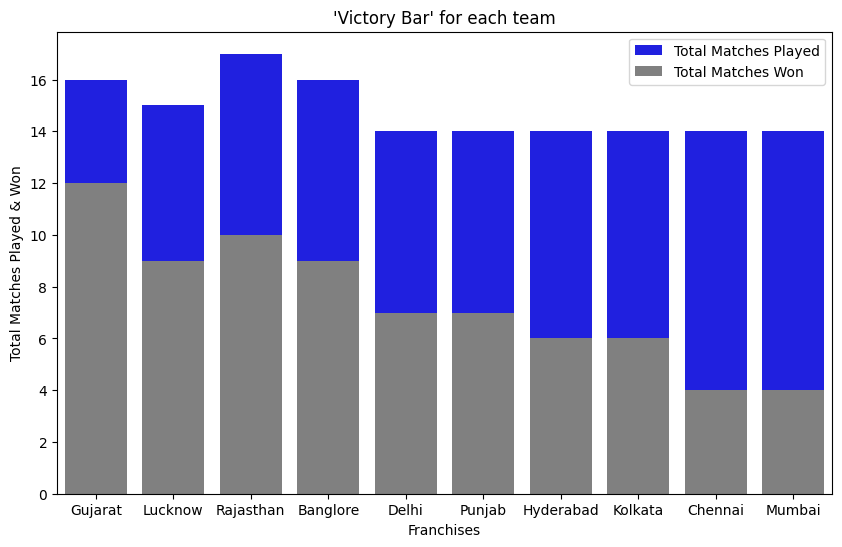

In [20]:
plt.figure(figsize=(10,6))

sns.barplot(x=team_performance.index, y=team_performance['Total Matches Played'], color='blue', label='Total Matches Played')
sns.barplot(x=team_performance.index, y=team_performance['Total Matches Won'], color='gray', label='Total Matches Won')
plt.xlabel('Franchises')
plt.ylabel('Total Matches Played & Won')
plt.title("'Victory Bar' for each team")

C:\Users\ARAVIND R\AppData\Local\Temp\ipykernel_3792\2766209971.py:3: UserWarning:

The palette list has more values (10) than needed (7), which may not be intended.



Text(0.5, 1.0, 'Win Percentage ')

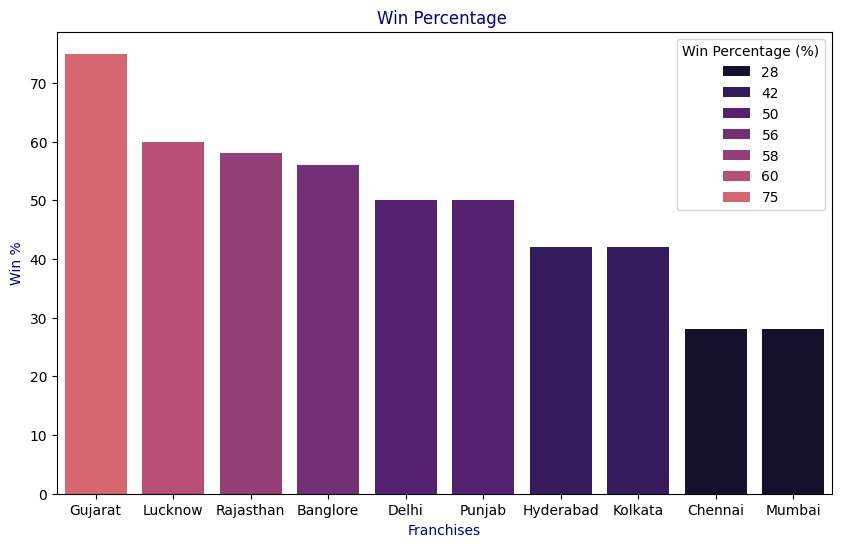

In [120]:
plt.figure(figsize=(10,6))
colors = sns.color_palette("magma", len(team_performance))
sns.barplot(x=team_performance.index, y=team_performance['Win Percentage (%)'], palette=colors, hue=team_performance['Win Percentage (%)'] )
plt.xlabel('Franchises', color='#00008B')
plt.ylabel('Win %', color='#00008B')
plt.title('Win Percentage ', color='#00008B')

In [22]:
# To display the top 10 players having the maximum number of "Playe of the Match" awards
potm = pd.DataFrame(data['player_of_the_match'].value_counts().head(10))
potm

,count
player_of_the_match,
Kuldeep Yadav,4
Jos Buttler,3
Umesh Yadav,2
Quinton de Kock,2
David Miller,2
Umran Malik,2
K L Rahul,2
Rahul Tripathi,2
Hardik Pandya,2


In [23]:
# To find how many times did a particular player receive "Player of the Match" award
david_player_of_match_award = (data['player_of_the_match']=='David Miller').sum()
print("Number of times did which David Miller receive Player of the Match award =", david_player_of_match_award)

Number of times did which David Miller receive Player of the Match award = 2


C:\Users\ARAVIND R\AppData\Local\Temp\ipykernel_3792\620142333.py:3: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(x=potm.index, y=potm['count'], palette=colors,hue=potm['count'])


Text(0.5, 1.0, 'Player of the Match Graph')

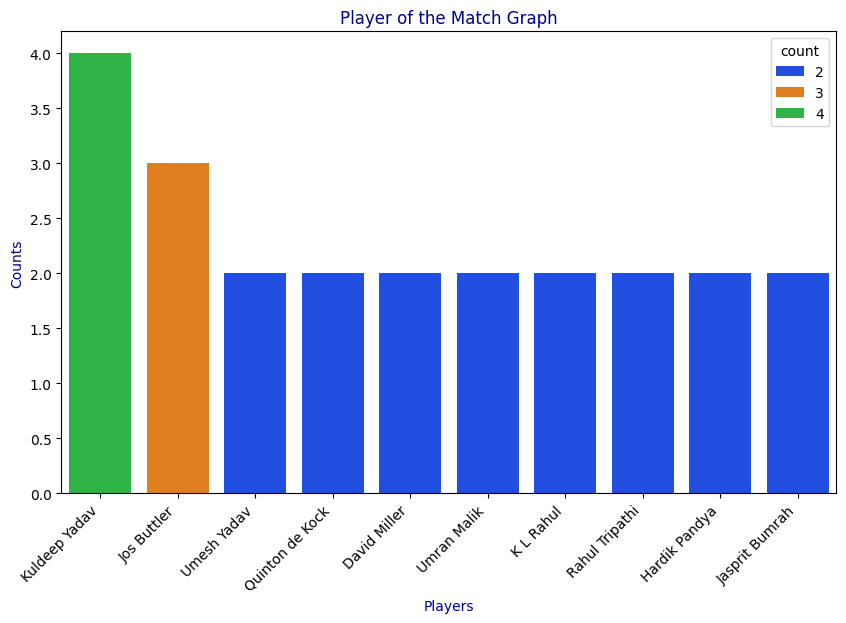

In [24]:
plt.figure(figsize=(10,6))
colors = sns.color_palette("bright", len(potm))
sns.barplot(x=potm.index, y=potm['count'], palette=colors,hue=potm['count'])
plt.xlabel('Players', color='#00008B')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylabel('Counts', color='#00008B')
plt.title('Player of the Match Graph', color='#00008B')

In [25]:
# To display the top 10 players having the total 'high score'
leading_run_scorer = pd.DataFrame(data.groupby('top_scorer')['highscore'].sum().sort_values(ascending=False)).head(10)
leading_run_scorer

,highscore
top_scorer,
Jos Buttler,651
Quinton de Kock,377
KL Rahul,351
Shubman Gill,288
Faf du Plessis,257
Liam Livingstone,239
David Warner,213
W. Saha,190
Ishan Kishan,180


In [26]:
# To find the total runs scored by a particular player in season 2022
jos_score = data[data['top_scorer']==('Jos Buttler')]['highscore'].sum()
jos_score

651

Text(0.5, 1.0, 'Leading Run Scorers')

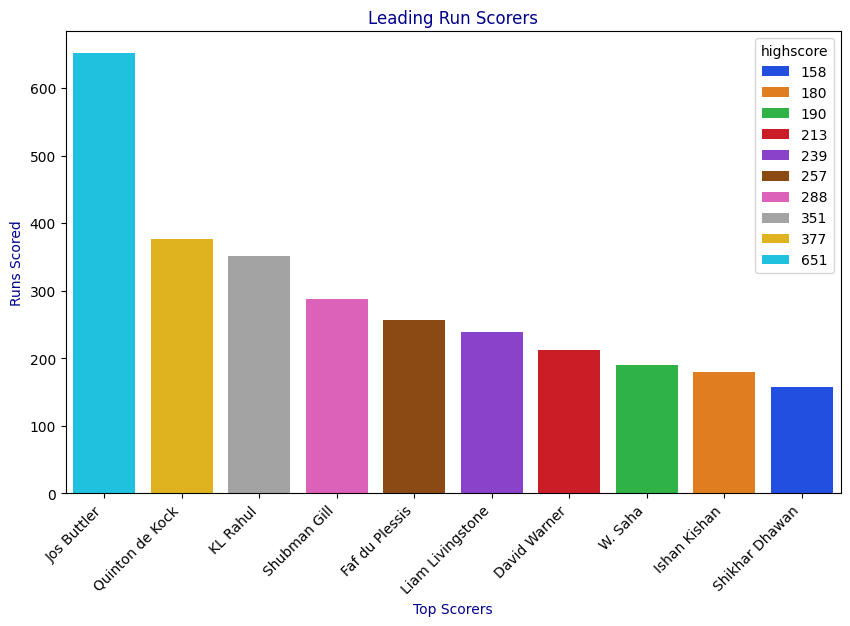

In [27]:
plt.figure(figsize=(10,6))
colors = sns.color_palette("bright", len(leading_run_scorer))
sns.barplot(x=leading_run_scorer.index, y=leading_run_scorer['highscore'], palette=colors,hue=leading_run_scorer['highscore'])
plt.xlabel('Top Scorers', color='#00008B')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylabel('Runs Scored', color='#00008B')
plt.title('Leading Run Scorers', color='#00008B')

In [28]:
# To find how many times a team won the match after winning the toss
toss_match_won = data[data['toss_winner']==data['match_winner']]['match_winner'].value_counts()
toss_match_won

match_winner
Gujarat      7
Kolkata      5
Hyderabad    5
Delhi        4
Banglore     4
Lucknow      4
Mumbai       3
Rajasthan    2
Punjab       1
Chennai      1
Name: count, dtype: int64

So, Gujart won the toss and won the match together 7 times, Kolkata 5 and Hyderbad 5 respectively. 

In [29]:
# To calculate the total matches won
match_won = data['match_winner'].value_counts()
match_won

match_winner
Gujarat      12
Rajasthan    10
Banglore      9
Lucknow       9
Delhi         7
Punjab        7
Kolkata       6
Hyderabad     6
Chennai       4
Mumbai        4
Name: count, dtype: int64

In [30]:
percentage_won = (toss_match_won / match_won * 100).astype(int).sort_values(ascending=False)
percentage_won = pd.DataFrame(percentage_won)
percentage_won

,count
match_winner,
Hyderabad,83
Kolkata,83
Mumbai,75
Gujarat,58
Delhi,57
Banglore,44
Lucknow,44
Chennai,25
Rajasthan,20


C:\Users\ARAVIND R\AppData\Local\Temp\ipykernel_3792\1423156363.py:3: UserWarning: The palette list has more values (10) than needed (8), which may not be intended.
  sns.barplot(x=percentage_won.index, y=percentage_won['count'], palette=colors,hue=percentage_won['count'])


Text(0.5, 1.0, 'Win Toss : Win Match Graph')

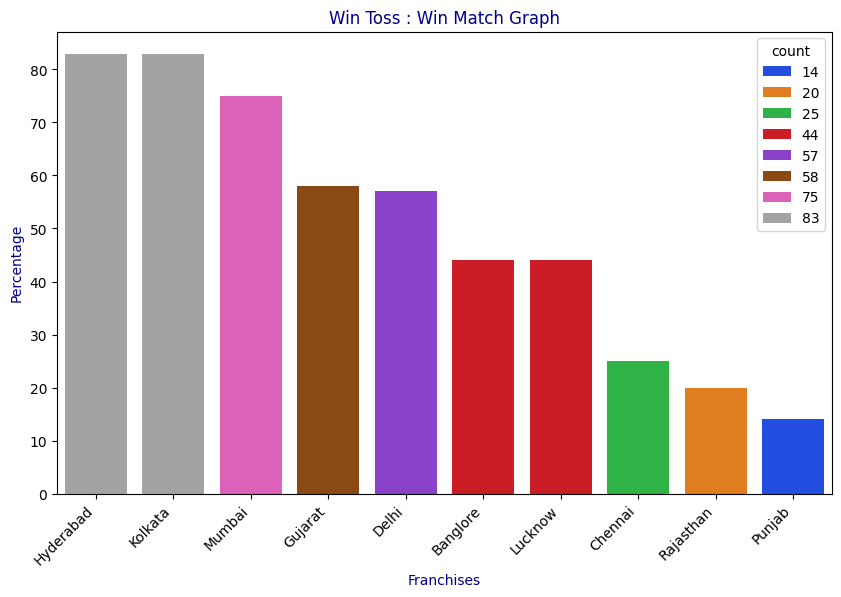

In [31]:
plt.figure(figsize=(10,6))
colors = sns.color_palette("bright")
sns.barplot(x=percentage_won.index, y=percentage_won['count'], palette=colors,hue=percentage_won['count'])
plt.xlabel('Franchises', color='#00008B')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylabel('Percentage', color='#00008B')
plt.title('Win Toss : Win Match Graph', color='#00008B')

So, Hyderbad and Kolkata has the highest win toss : win match ratio.

In [34]:
# Count the number of matches won by each winning methods, i.e. by Runs or Wickets
data['won_by'].value_counts()

won_by
Wickets    37
Runs       37
Name: count, dtype: int64

That is, 37 matches were won by batting first and 37 matches were won by chasing, which shows a balance in terms of defending and chasing.

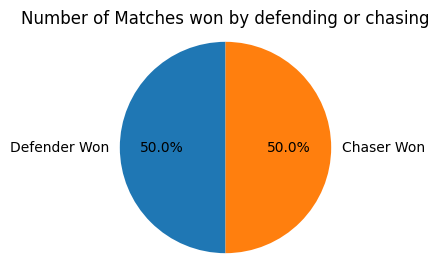

In [53]:
v = data["won_by"].value_counts()
plt.figure(figsize=(3, 3))
plt.pie(v.values, labels=['Defender Won','Chaser Won'], autopct='%1.1f%%', startangle=90)
plt.axis('equal') 
plt.title('Number of Matches won by defending or chasing')
plt.show()

In [67]:
chase_wicket = data[data['won_by']=='Wickets']['margin'].sort_values(ascending=False)
chase_wicket.values

array([9, 9, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 3, 3, 3], dtype=int64)

Shows convincing victories (9) and close games (3).

In [68]:
# Descriptive statistics for victory by chasing
chase_wicket.describe().astype(int)

count    37
mean      6
std       1
min       3
25%       5
50%       6
75%       7
max       9
Name: margin, dtype: int32

In [69]:
defend_runs = data[data['won_by']=='Runs']['margin'].sort_values(ascending=False)
defend_runs.values

array([91, 75, 67, 62, 61, 54, 54, 54, 52, 44, 37, 36, 29, 24, 23, 23, 21,
       20, 18, 18, 17, 16, 15, 14, 14, 13, 13, 12, 12, 11,  8,  7,  6,  5,
        3,  3,  2], dtype=int64)

Shows convincing victories (91) and close games (2).

In [70]:
defend_runs.describe().astype(int)

count    37
mean     27
std      23
min       2
25%      12
50%      18
75%      44
max      91
Name: margin, dtype: int32

Text(0.5, 0, 'Margin of Runs')

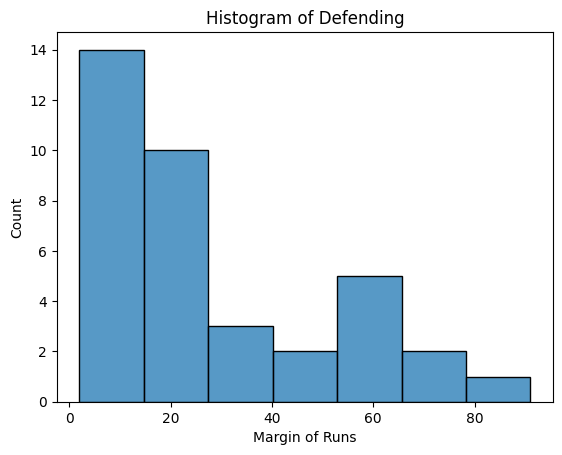

In [124]:
Defender = data[data['won_by']=='Runs']
sns.histplot(Defender, x='margin')
plt.title('Histogram of Defending')
plt.xlabel('Margin of Runs')

Text(0.5, 0, 'Margin of Wickets')

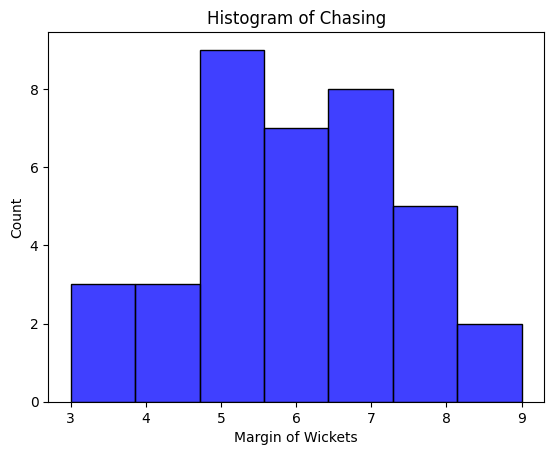

In [125]:
Chaser = data[data['won_by']=='Wickets']
sns.histplot(Chaser, x='margin', color='blue')
plt.title('Histogram of Chasing')
plt.xlabel('Margin of Wickets')

In [100]:
best_bowler = pd.DataFrame(data['best_bowling'].value_counts().head(10))
best_bowler

,count
best_bowling,
Yuzvendra Chahal,5
Rashid Khan,4
T Natarajan,3
Kagiso Rabada,3
Jasprit Bumrah,3
Kuldeep Yadav,3
Avesh Khan,3
Josh Hazlewood,3
Dwayne Bravo,2


Yuzvendra Chahal was so impressive with best bowling performance in 5 matches.

C:\Users\ARAVIND R\AppData\Local\Temp\ipykernel_3792\4063960410.py:3: UserWarning:

The palette list has more values (10) than needed (4), which may not be intended.



Text(0.5, 1.0, 'Best Bowlers')

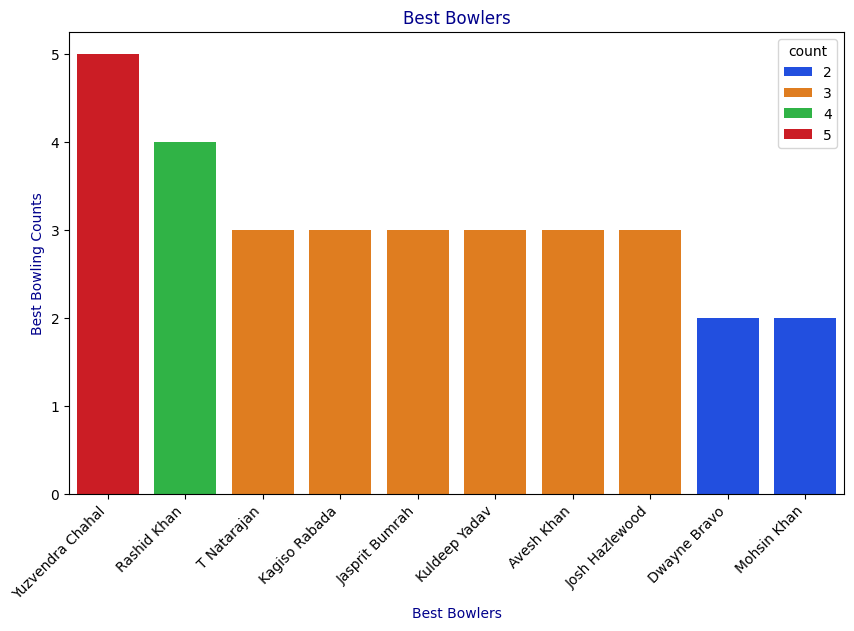

In [107]:
plt.figure(figsize=(10,6))
colors = sns.color_palette("bright")
sns.barplot(x=best_bowler.index, y= best_bowler['count'], palette=colors,hue= best_bowler['count'])
plt.xlabel('Best Bowlers', color='#00008B')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylabel('Best Bowling Counts', color='#00008B')
plt.title('Best Bowlers', color='#00008B')

In [115]:
# To count the number of matches hosted at a venue
venue=pd.DataFrame(data['venue'].value_counts().astype(int))
venue

,count
venue,
"Wankhede Stadium, Mumbai",21
"Dr DY Patil Sports Academy, Mumbai",20
"Brabourne Stadium, Mumbai",16
"Maharashtra Cricket Association Stadium,Pune",13
"Eden Gardens, Kolkata",2
"Narendra Modi Stadium, Ahmedabad",2


C:\Users\ARAVIND R\AppData\Local\Temp\ipykernel_3792\4149780425.py:3: UserWarning:

The palette list has more values (10) than needed (5), which may not be intended.



Text(0.5, 1.0, 'Venue with Most Matches')

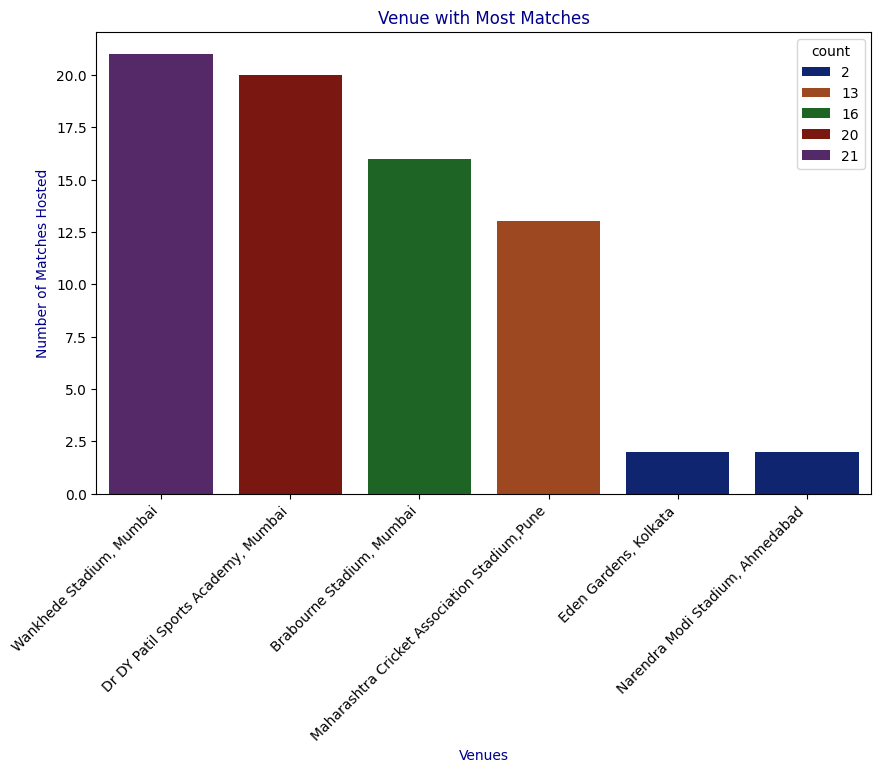

In [117]:
plt.figure(figsize=(10,6))
colors = sns.color_palette("dark")
sns.barplot(x=venue.index, y=venue['count'], palette=colors,hue= venue['count'])
plt.xlabel('Venues', color='#00008B')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylabel('Number of Matches Hosted', color='#00008B')
plt.title('Venue with Most Matches', color='#00008B')


- Gujart won the most number of matches (12).
- Jos Buttler was the leading run scorer (651).
- The two mumbai venues hosted the most number of matches (21).
- Gujart and Hyderbad won the toss more compared to others.
- Equality exists between and Chasing and Defending scores.
- Yuzvendra Chahal gained most of 'best bowling' performance.